In [42]:
import numpy as np

In [43]:
def grad1_u(x,u,v): #u'
    return v

In [44]:
def grad2_u(x,u,v): #u''
    return x + v - 2*u

In [45]:
rng = (0,1)

In [46]:
#a1*U(0) + a2*U`(0) = g1
#b1*U(1) + b2*U`(1) = g2

In [47]:
def initial_condition(a1,a2,g1):
    return (g1/a2),((g1-a1)/a2)

In [48]:
#IVP 1 
a_0 = 0
#IVP 2
b_0 = 1
a_grad_0,b_grad_0 = initial_condition(1,-1,-1)

In [49]:
def solver_RK4(init,init_grad,rn=(0,1),h=0.1):
    initial,final = rn
    #N = int((final - initial)/h)
    T = np.arange(initial,final,h)
    u_0 = init
    u_1 = init_grad
    u_plot = []
    u_plot.append(u_0.tolist())
    for i in T:
        k1 = h*grad1_u(i,u_0,u_1)
        l1 = h*grad2_u(i,u_0,u_1)
        k2 = h*grad1_u((i+h/2),(u_0+k1/2),(u_1+l1/2))
        l2 = h*grad2_u((i+h/2),(u_0+k1/2),(u_1+l1/2))
        k3 = h*grad1_u((i+h/2),(u_0+k2/2),(u_1+l2/2))
        l3 = h*grad2_u((i+h/2),(u_0+k2/2),(u_1+l2/2))
        k4 = h*grad1_u((i+h),(u_0+k3),(u_1+l3))
        l4 = h*grad2_u((i+h),(u_0+k3),(u_1+l3))
        u_0 = u_0 + 1/6.0*(k1+2*k2+2*k3+k4)
        u_1 = u_1 + 1/6.0*(l1+2*l2+2*l3+l4)
        #print(u_0,u_1)
        u_plot.append(u_0.tolist())
    
    print("u=",u_0)
    print("u'=",u_1)
    return u_0,u_1,u_plot,T

In [50]:
c_0 = np.array([a_0,b_0])
c_grad = np.array([a_grad_0,b_grad_0])
ub,ub_grad,u_plt,T_space = solver_RK4(c_0,c_grad,rng,0.01)
T_space = np.append(T_space,np.array(rng[1]))
u_plt = np.matrix(u_plt)

u= [1.40398667 2.41266916]
u'= [1.6084461  0.20070916]


In [51]:
def u_final(lamda,u):
    return lamda*u[:,0] + (1-lamda)*u[:,1]

In [52]:
def boundary_condition(u,u_grad,b1,b2,g2):
    return (g2 - u[1]*b1 - u_grad[1]*b2)/((u[0]-u[1])*b1 + (u_grad[0]-u_grad[1])*b2)

In [53]:
lamda = boundary_condition(ub,ub_grad,1,1,-2)
lamda

-11.560773911016362

In [22]:
U = u_final(lamda,u_plt)

In [23]:
import matplotlib.pyplot as plt

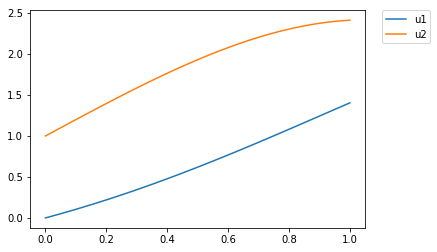

In [24]:
plt.plot(T_space,u_plt[:,0],label="u1")
plt.plot(T_space,u_plt[:,1],label="u2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

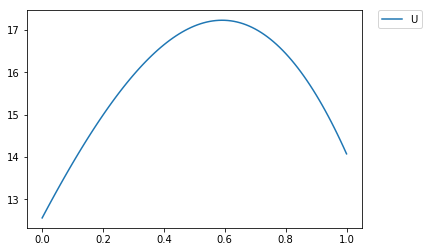

In [25]:
plt.gcf().clear()
plt.plot(T_space,U,label="U")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()